# Демо-экзамен по курсу "Прикладной анализ данных". Вариант 1

Выполнил: *Ушаков Андрей Вячеславович, М24-505*

Название ВУЗа, в котором обучаетесь: НИЯУ МИФИ

Вставьте ниже скриншот с результатом вашего решения в Leaderboard на Kaggle: https://www.kaggle.com/competitions/where-are-the-seagulls

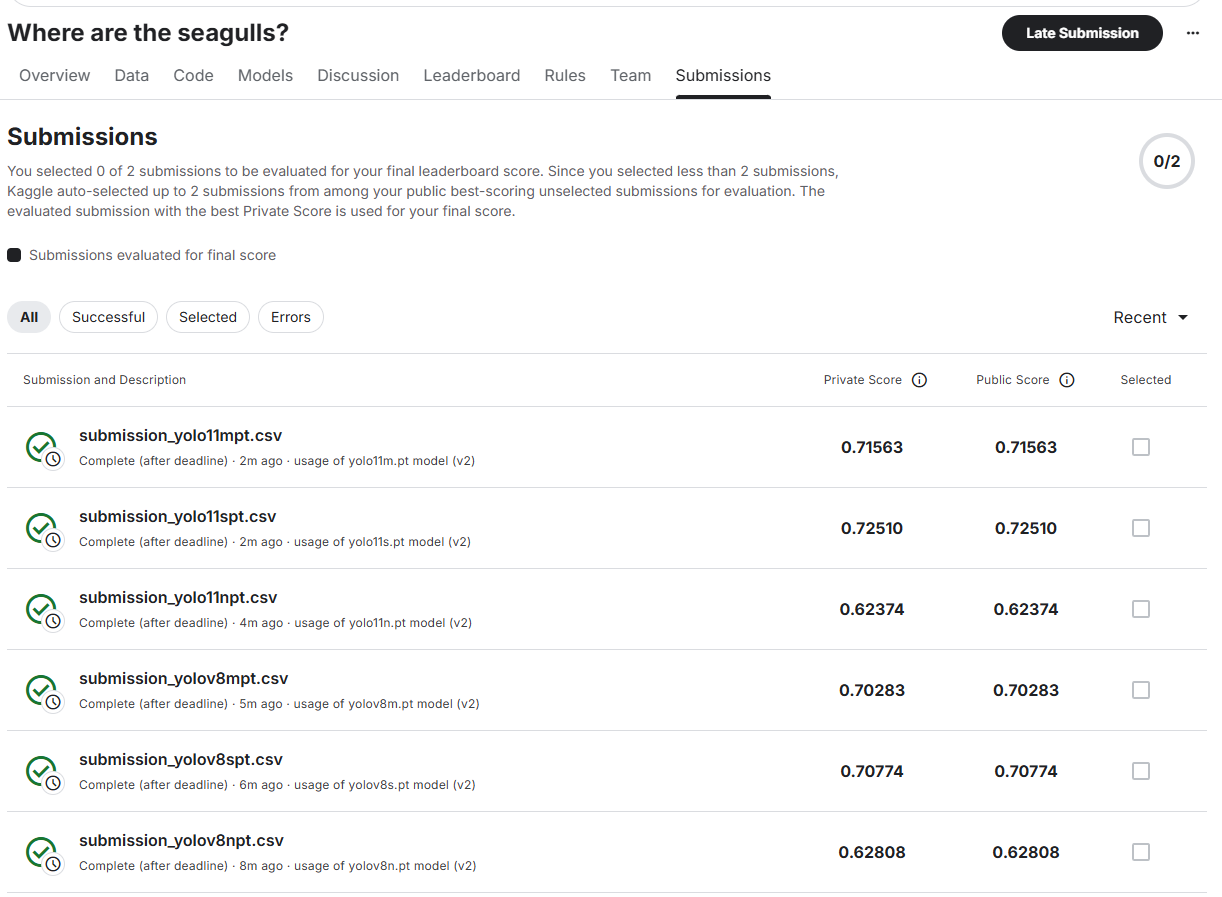

## 1. Описание задачи и данные

В 4 километрах от тихоокеанского берега Камчатки в бухте Вестник лежит остров Уташуд — часть Южно-Камчатского федерального заказника. На нем живут каланы, антуры, тюлени ларги, около 50 тысяч птиц десяти разных видов, включая  колонию топорика численностью 10 тыс. пар. В данной задаче нас интересуют двое обитатаелей острова – ларга и техоокеанская чайка, за которыми осуществляется наблюдение через фотоловушки в летний сезон.

На Уташуде находится репродуктивное лежбище тюленей-ларга  и одно из крупнейших на Камчатке поселений тихоокеанской чайки (4 тыс. пар). За 1 сезон наблюдения за этими животными может накопится более 1800 фотографий различного качества. Через эти фотографии инспекторы оценивают благополучие и численность животных.

Разработайте алгоритм, который бы позволил производить учет чаек и выделять их по фотографии.

Ссылка на соревнование и на данные: https://www.kaggle.com/competitions/where-are-the-seagulls

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Пропишите дополнительные библиотеки, которые потребуются для решения
import collections
import pathlib
import PIL as pillow


In [3]:
# установим библиотеку для работы с датасетами на kaggle
!pip install opendatasets --quiet

Небольшая инструкция как напрямую скачать данные с kaggle в Colab ноутбук: https://www.geeksforgeeks.org/python/how-to-import-kaggle-datasets-directly-into-google-colab/

In [4]:
!rm -rf where-are-the-seagulls

In [5]:
import opendatasets as od
import pandas as pd

url = 'https://www.kaggle.com/competitions/where-are-the-seagulls'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  stdstring


Your Kaggle Key:

  ········


100%|██████████| 36.7M/36.7M [00:00<00:00, 1.15GB/s]


Extracting archive ./where-are-the-seagulls/where-are-the-seagulls.zip to ./where-are-the-seagulls


install YOLO

In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.2 MB/s eta 0:00:00:00:0100:01
  Attempting unins

In [7]:
import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## 1. Провести предварительное исследование данных

- в каком формате вам предоставлены данные?

  Данные представлены в следующем виде:
  
  1) изображений в формате JPEG (расположены в директориях train/images и test/images)
  
  2) аннотации в формате YOLO в виде текстовых файлов .txt (расположены в директории train/labels).
  
  Каждый файл с аннотациями содержит 0 или более строк вида `<class_id> <x_center> <y_center> <width> <height>`, где `class_id` - идентификатор класса (целое число), `x_center, y_center` - центр bbox по ширине и высоте, `width, height` - размеры bbox. В нашем случае: `class_id` = 0 для всех объектов (чайки), все остальные значения нормированы (0–1).  

- какие есть особенности датасета?

  Я провел небольшой анализ и выяснил следующее (анализ/проверки см. ниже):

  1) Для тренировочных данных у каждого файла с изображением есть соответствующий ему (т.е. совпадающий по имени без расширения) файл с аннотациями. Т.е. производить очистку тренировочных данных не нужно

  2) В тренировочном множестве всего 500 изображений. Из них 468 изображений с чайками и 32 без чаек. Т.е. у нас есть явный дисбаланс в данных. Поэтому я перед обучением сгенерирую некоторое количество дополнительных изображений без чаек (на основе существующих изображений без чаек с помощью аугментаций), чтобы восстановить баланс.

  3) Все изображения (как из train выборки, так и из test выборки) одного и того же размера размера - 640 * 640

- если необходимо произвести очистку и предварительную обработку данных.

  1) Очистку данных производить не нужно.
  
  2) На данном этапе предобработку данных выполнять не будет, т.к. все изображения (как из train выборки, так и из test выборки) одного и того же размера размера - 640 * 640. Однако, т.к. изображения разного качества (см. условие задачи), то в будущем мне возможно потребуется некоторая предобработка данных через аугментацию

  3) У меня дисбаланс в тренировочных данных между с изображениями с чайками (468 штук) и с изображениями без чаек (32 штуки). Необходимо сгенерировать некоторое количество дополнительных изображений без чаек (на основе существующих изображений без чаек с помощью аугментаций), чтобы восстановить баланс.

Проверяем, что у каждого файла с изображением есть соответствующий файл с аннтоациями (для train данных)

In [8]:
images_names = set(map(lambda path: path.stem, pathlib.Path("./where-are-the-seagulls/data/train/images").glob("*")))
labels_names = set(map(lambda path: path.stem, pathlib.Path("./where-are-the-seagulls/data/train/labels").glob("*")))
print(f"images without lables: {images_names.difference(labels_names)}")
print(f"labels without images: {labels_names.difference(images_names)}")

images without lables: set()
labels without images: set()


Проверяем, как распределены данные между случаями: на изображении есть чайки и на изображении нет чаек:

In [9]:
def get_label_len(image_file):
  return len(pathlib.Path(image_file.parent.parent).joinpath(f"labels/{image_file.stem}.txt").read_text().strip())

def calc_train_balance(root_dir):
  total_count = len(list(pathlib.Path(root_dir).joinpath("images").glob("*")))
  empty_count = len(list(filter(lambda label_len: label_len == 0, map(get_label_len, pathlib.Path(root_dir).joinpath("images").glob("*")))))
  nonempty_count = len(list(filter(lambda label_len: label_len != 0, map(get_label_len, pathlib.Path(root_dir).joinpath("images").glob("*")))))
  return (total_count, empty_count, nonempty_count)

total_count, empty_count, nonempty_count = calc_train_balance("./where-are-the-seagulls/data/train/")
print(f"total images count: {total_count}")
print(f"images without seagulls count: {empty_count}")
print(f"images with seagulls count: {nonempty_count}")

total images count: 500
images without seagulls count: 32
images with seagulls count: 468


Проверяем распределение размеров изображений для учебного и проверяемого набора данных

In [10]:
train_sizes = map(lambda image_file: pillow.Image.open(image_file).size ,pathlib.Path("./where-are-the-seagulls/data/train/images").glob("*"))
train_counter = collections.Counter(train_sizes)
print(f"Counter for train images sizes: {train_counter}")
test_sizes = map(lambda image_file: pillow.Image.open(image_file).size ,pathlib.Path("./where-are-the-seagulls/data/test/images").glob("*"))
test_counter = collections.Counter(test_sizes)
print(f"Counter for test images sizes: {test_counter}")

Counter for train images sizes: Counter({(640, 640): 500})
Counter for test images sizes: Counter({(640, 640): 99})


## 2. Подготовить данные для обучения

- Создать тренировочную и тестовую подвыборки для обучения и тестирования работы моделей
- Создать класс на фреймворке `PyTorch` для создания датасета
- Создать `loader` для передачи данных в модель нейронной сети

*P.s.: если вам удобнее использовать Keras или другой формат обработки данных и построения моделей, вы можете их использовать, не обязательно идти по пути `PyTorch` и `loader`.

Вычисляю необходимое количество и генерирую дополнительные изображения без чаек (на основе существующих изображений без чаек с помощью аугментаций), чтобы восстановить баланс. Вывожу баланс тренировочных данных до и после генерации

In [11]:
import random
from PIL import ImageEnhance, ImageFilter

# remove previously generated data
for image_file in pathlib.Path("./where-are-the-seagulls/data/train/images").glob("generated*"):
  image_file.unlink()
for label_file in pathlib.Path("./where-are-the-seagulls/data/train/label").glob("generated*"):
  label_file.unlink()

total_count_before, empty_count_before, nonempty_count_before = calc_train_balance("./where-are-the-seagulls/data/train/")
print(f"total images count before: {total_count_before}")
print(f"images without seagulls count before: {empty_count_before}")
print(f"images with seagulls count before: {nonempty_count_before}")

empty_images = list(filter(lambda image_file: get_label_len(image_file) == 0, pathlib.Path("./where-are-the-seagulls/data/train/images").glob("*")))

random.seed()
for index in range(nonempty_count - empty_count_before):
  current_image = pillow.Image.open(empty_images[index % len(empty_images)])
  # sharpness
  current_image = ImageEnhance.Sharpness(current_image).enhance(random.uniform(1, 10))
  # contrast
  current_image = ImageEnhance.Contrast(current_image).enhance(random.uniform(1, 10))
  # color
  current_image = ImageEnhance.Color(current_image).enhance(random.uniform(1, 10))
  # brightness
  current_image = ImageEnhance.Brightness(current_image).enhance(random.uniform(1, 10))
  # blur
  current_image = current_image.filter(ImageFilter.BoxBlur(radius=random.randrange(1, 10)))
  current_image.save(f"./where-are-the-seagulls/data/train/images/generated_{index + 1}.jpg")
  pathlib.Path(f"./where-are-the-seagulls/data/train/labels/generated_{index + 1}.txt").write_text("")

total_count_after, empty_count_after, nonempty_count_after = calc_train_balance("./where-are-the-seagulls/data/train/")
print(f"total images count after: {total_count_after}")
print(f"images without seagulls count after: {empty_count_after}")
print(f"images with seagulls count after: {nonempty_count_after}")


total images count before: 500
images without seagulls count before: 32
images with seagulls count before: 468
total images count after: 936
images without seagulls count after: 468
images with seagulls count after: 468


- Создаю тренировочную и тестовую подвыборки для обучения и тестирования работы моделей


In [12]:
import sklearn.model_selection as skselection
import shutil

# remove previously splitted data
shutil.rmtree("./where-are-the-seagulls/data/prepared/", ignore_errors=True)

images_files = list(pathlib.Path("./where-are-the-seagulls/data/train/images").glob("*"))
train_files, validate_files = skselection.train_test_split(images_files, test_size=0.2, random_state=42)

pathlib.Path("./where-are-the-seagulls/data/prepared/").mkdir()
pathlib.Path("./where-are-the-seagulls/data/prepared/train").mkdir()
pathlib.Path("./where-are-the-seagulls/data/prepared/train/images").mkdir()
pathlib.Path("./where-are-the-seagulls/data/prepared/train/labels").mkdir()
pathlib.Path("./where-are-the-seagulls/data/prepared/validate").mkdir()
pathlib.Path("./where-are-the-seagulls/data/prepared/validate/images").mkdir()
pathlib.Path("./where-are-the-seagulls/data/prepared/validate/labels").mkdir()

for image in train_files:
  shutil.copy(image, pathlib.Path("./where-are-the-seagulls/data/prepared/train/images").joinpath(image.name))
  label_filename = f"{image.stem}.txt"
  shutil.copy(pathlib.Path("./where-are-the-seagulls/data/train/labels").joinpath(label_filename), pathlib.Path("./where-are-the-seagulls/data/prepared/train/labels").joinpath(label_filename))

for image in validate_files:
  shutil.copy(image, pathlib.Path("./where-are-the-seagulls/data/prepared/validate/images").joinpath(image.name))
  label_filename = f"{image.stem}.txt"
  shutil.copy(pathlib.Path("./where-are-the-seagulls/data/train/labels").joinpath(label_filename), pathlib.Path("./where-are-the-seagulls/data/prepared/validate/labels").joinpath(label_filename))

total_count_train, empty_count_train, nonempty_count_train = calc_train_balance("./where-are-the-seagulls/data/prepared/train/")
print(f"total images count in train portion: {total_count_train}")
print(f"images without seagulls count in train portion: {empty_count_train}")
print(f"images with seagulls count in train portion: {nonempty_count_train}")

total_count_validate, empty_count_validate, nonempty_count_validate = calc_train_balance("./where-are-the-seagulls/data/prepared/validate/")
print(f"total images count in validate portion: {total_count_validate}")
print(f"images without seagulls count in validate portion: {empty_count_validate}")
print(f"images with seagulls count in validate portion: {nonempty_count_validate}")


total images count in train portion: 748
images without seagulls count in train portion: 378
images with seagulls count in train portion: 370
total images count in validate portion: 188
images without seagulls count in validate portion: 90
images with seagulls count in validate portion: 98


- Создать класс на фреймворке `PyTorch` для создания датасета
- Создать `loader` для передачи данных в модель нейронной сети

Я использую YOLO для решения этой задачи, что позволяет решать ее без создания отдельных классов датасет и `loader`

## 3. Реализация модели

- создать класс для модели
- создать функцию для обучения модели
- создать функцию для валидации модели

Я использую YOLO для решения этой задачи, что позволяет решать ее без создания отдельного класса для модели и отдельных функций для обучения и валидации (хотя ниже я процесс валидации выделю в отдельную функцию)

Создаем и сохраняем конфигурационный файл для запуска YOLO для решения задачи:

In [13]:
import yaml

data_config = {
    'train': "./train",
    'val': "./validate",
    'test': "../test",
    'nc': 1,
    'names': ['seagull']
}
with open("./where-are-the-seagulls/data/prepared/data.yaml", "w") as config_file:
    yaml.dump(data_config, config_file)

## 4. Обучение модели


Проверяю доступность CUDA

In [14]:
import torch
print(f"CUDA is available: {torch.cuda.is_available()}")

CUDA is available: True


Определяю необходимые параметры для обучения модели (часть из них заданы по умолчанию) и обучаю модель (здесь в качестве модели беру модель yolov8n.pt)

In [15]:
print("training yolov8n.pt ...")
task_model = ultralytics.YOLO("yolov8n.pt")
task_model.train(data="./where-are-the-seagulls/data/prepared/data.yaml", epochs=50, imgsz=640, batch=8, patience=15, device=0)

training yolov8n.pt ...


100%|██████████| 6.25M/6.25M [00:00<00:00, 80.5MB/s]


Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./where-are-the-seagulls/data/prepared/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=1

100%|██████████| 755k/755k [00:00<00:00, 16.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 980.5±628.6 MB/s, size: 48.5 KB)


train: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/train/labels... 748 images, 378 backgrounds, 0 corrupt: 100%|██████████| 748/748 [00:00<00:00, 1620.58it/s]

train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200910_185837_01_JPG.rf.cdf85cd8e98797d94fb93d972d58fc5f.jpg: 1 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200913_121758_01_JPG.rf.126b4bd798cd834f2c08f1c85a6fee70.jpg: 1 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200913_171925_01_JPG.rf.de1d151832416a3f2df30dcdbf84bf8a.jpg: 3 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200924_183741_01_JPG.rf.cbc768e717616cc48643dba4f3a76bbd.jpg: 3 duplicate labels removed
train: New cache created: /kaggle/working/where-are-the-seagulls/data/prepared/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 414.0±97.7 MB/s, size: 53.3 KB)


val: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/validate/labels... 188 images, 90 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<00:00, 1479.66it/s]

val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200816_180222_01_JPG.rf.5f3bc87ff01f17b2a00c3ecf18d14ac5.jpg: 2 duplicate labels removed
val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200819_182328_01_JPG.rf.cca24be539aa73a24a2bf112ab67fe68.jpg: 3 duplicate labels removed
val: New cache created: /kaggle/working/where-are-the-seagulls/data/prepared/validate/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.23G      2.308      2.596      1.162          7        640: 100%|██████████| 94/94 [00:11<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.03it/s]

                   all        188       1185       0.82       0.15      0.385      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.38G      2.199      1.744      1.126         18        640: 100%|██████████| 94/94 [00:09<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.87it/s]


                   all        188       1185      0.356      0.495      0.264     0.0879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.38G      2.265      1.675      1.141         39        640: 100%|██████████| 94/94 [00:08<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.15it/s]

                   all        188       1185      0.607      0.577      0.596      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.41G      2.217      1.612      1.132         26        640: 100%|██████████| 94/94 [00:08<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.53it/s]

                   all        188       1185      0.656      0.641      0.658      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.43G      2.148      1.404      1.119         33        640: 100%|██████████| 94/94 [00:08<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.61it/s]

                   all        188       1185      0.733      0.639      0.692      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.45G      2.126      1.331      1.111          7        640: 100%|██████████| 94/94 [00:08<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.50it/s]

                   all        188       1185      0.753      0.637      0.706      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.46G      2.143      1.303      1.129         36        640: 100%|██████████| 94/94 [00:08<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.71it/s]

                   all        188       1185      0.782      0.614      0.699      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.48G      2.079      1.258      1.098         39        640: 100%|██████████| 94/94 [00:09<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.03it/s]

                   all        188       1185      0.726      0.634      0.703      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       1.5G      2.073       1.32      1.092         48        640: 100%|██████████| 94/94 [00:08<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.51it/s]

                   all        188       1185      0.774      0.671      0.741      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.51G      2.092      1.229      1.107         13        640: 100%|██████████| 94/94 [00:08<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.95it/s]

                   all        188       1185      0.739      0.635      0.709      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.53G      2.017      1.207      1.085         81        640: 100%|██████████| 94/94 [00:08<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.66it/s]

                   all        188       1185      0.774       0.66      0.741      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.55G      2.039       1.19      1.078         45        640: 100%|██████████| 94/94 [00:09<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.34it/s]

                   all        188       1185      0.731      0.684      0.737      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.57G      2.044      1.204      1.089          8        640: 100%|██████████| 94/94 [00:08<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.70it/s]

                   all        188       1185      0.771      0.707      0.764      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.58G      1.981      1.133      1.081         10        640: 100%|██████████| 94/94 [00:08<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.16it/s]

                   all        188       1185      0.796      0.684      0.766      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       1.6G      2.032      1.165      1.082         71        640: 100%|██████████| 94/94 [00:09<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.61it/s]

                   all        188       1185      0.775      0.658      0.742      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.62G      1.972      1.121      1.074         16        640: 100%|██████████| 94/94 [00:08<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.46it/s]

                   all        188       1185       0.77      0.673      0.752      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.63G      1.961      1.105      1.075         29        640: 100%|██████████| 94/94 [00:08<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.37it/s]

                   all        188       1185       0.77      0.657       0.75      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.65G      1.986      1.118      1.062         36        640: 100%|██████████| 94/94 [00:09<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.27it/s]

                   all        188       1185      0.783      0.646      0.748      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.66G      1.969       1.08      1.061         85        640: 100%|██████████| 94/94 [00:08<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.14it/s]

                   all        188       1185       0.81      0.682      0.777      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.68G      1.943      1.084      1.052         26        640: 100%|██████████| 94/94 [00:08<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.46it/s]

                   all        188       1185       0.77      0.693      0.767      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       1.7G      1.996      1.072      1.067         49        640: 100%|██████████| 94/94 [00:09<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.79it/s]

                   all        188       1185      0.763      0.699      0.768      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.72G      1.973      1.072      1.075         33        640: 100%|██████████| 94/94 [00:08<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.66it/s]

                   all        188       1185      0.779       0.69      0.775       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.73G      1.914      1.076      1.055         23        640: 100%|██████████| 94/94 [00:08<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.54it/s]

                   all        188       1185        0.8        0.7      0.773      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.75G      1.933      1.054      1.057         21        640: 100%|██████████| 94/94 [00:08<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.86it/s]

                   all        188       1185       0.78      0.696      0.774      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.77G      1.937      1.051      1.051         30        640: 100%|██████████| 94/94 [00:08<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.60it/s]


                   all        188       1185      0.772       0.73      0.786      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.79G      1.915      1.043       1.04         49        640: 100%|██████████| 94/94 [00:08<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.01it/s]


                   all        188       1185      0.814      0.676      0.769      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       1.8G      1.929      1.032      1.051         54        640: 100%|██████████| 94/94 [00:08<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.68it/s]

                   all        188       1185      0.797      0.716      0.795      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.82G      1.907      1.024      1.059         12        640: 100%|██████████| 94/94 [00:08<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.75it/s]

                   all        188       1185       0.79      0.697      0.781      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.84G      1.897      1.033      1.043         25        640: 100%|██████████| 94/94 [00:08<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.66it/s]

                   all        188       1185       0.83       0.69      0.783      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.86G       1.91      1.008      1.036         42        640: 100%|██████████| 94/94 [00:08<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.68it/s]

                   all        188       1185      0.813      0.688       0.79      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.87G      1.909      1.012      1.035          3        640: 100%|██████████| 94/94 [00:08<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.03it/s]

                   all        188       1185        0.8      0.685      0.778      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.89G      1.841      0.996      1.028         26        640: 100%|██████████| 94/94 [00:08<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.37it/s]

                   all        188       1185      0.819      0.732      0.802      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.91G       1.88     0.9717      1.037         33        640: 100%|██████████| 94/94 [00:08<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.30it/s]

                   all        188       1185      0.816       0.73      0.804      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.93G      1.868     0.9914       1.04          7        640: 100%|██████████| 94/94 [00:08<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.20it/s]

                   all        188       1185      0.829      0.711      0.807      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.93G      1.895      0.992      1.044         42        640: 100%|██████████| 94/94 [00:08<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.04it/s]

                   all        188       1185      0.813      0.727      0.809      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.96G       1.85     0.9606      1.017         42        640: 100%|██████████| 94/94 [00:08<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.61it/s]

                   all        188       1185      0.832      0.734      0.813       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.97G      1.858     0.9635      1.029         26        640: 100%|██████████| 94/94 [00:08<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.91it/s]

                   all        188       1185      0.824      0.709      0.796      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.99G      1.898     0.9961      1.036         50        640: 100%|██████████| 94/94 [00:08<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.96it/s]


                   all        188       1185      0.803      0.759      0.811      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.01G       1.83     0.9682      1.039         41        640: 100%|██████████| 94/94 [00:08<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.78it/s]

                   all        188       1185       0.81      0.713      0.798      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.03G      1.824     0.9415      1.021         13        640: 100%|██████████| 94/94 [00:08<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.81it/s]

                   all        188       1185      0.815      0.727      0.804      0.371


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.04G      1.778     0.9912      1.032         25        640: 100%|██████████| 94/94 [00:09<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.16it/s]

                   all        188       1185      0.816      0.725      0.802      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.06G      1.793     0.9283      1.047         27        640: 100%|██████████| 94/94 [00:08<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.66it/s]

                   all        188       1185      0.812      0.745       0.81      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.07G      1.769     0.9137      1.038          0        640: 100%|██████████| 94/94 [00:08<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.84it/s]

                   all        188       1185      0.823      0.734      0.809      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.09G      1.776     0.9031      1.041         21        640: 100%|██████████| 94/94 [00:08<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.72it/s]

                   all        188       1185      0.832      0.755      0.823      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.11G       1.73     0.8785      1.027         33        640: 100%|██████████| 94/94 [00:08<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.67it/s]

                   all        188       1185      0.837      0.739      0.818       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.13G      1.741     0.9249      1.008         24        640: 100%|██████████| 94/94 [00:08<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.89it/s]


                   all        188       1185      0.839      0.742      0.822      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.14G      1.752     0.8922      1.061         20        640: 100%|██████████| 94/94 [00:08<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.89it/s]

                   all        188       1185      0.845       0.74      0.826       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.16G      1.744     0.8799      1.051         19        640: 100%|██████████| 94/94 [00:08<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.30it/s]

                   all        188       1185      0.835      0.756      0.826       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.18G      1.762     0.8714      1.046         35        640: 100%|██████████| 94/94 [00:08<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.99it/s]

                   all        188       1185      0.829       0.75      0.823      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.2G      1.732      0.878       1.02         33        640: 100%|██████████| 94/94 [00:08<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.89it/s]

                   all        188       1185      0.828      0.753      0.823      0.385



50 epochs completed in 0.142 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        188       1185      0.829      0.751      0.823      0.385
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf72dfbdf50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Оцениваю эффективность работы модели

In [16]:
def validate_modle(model, model_name):
  metrics = model.val(data="./where-are-the-seagulls/data/prepared/data.yaml", imgsz=640, batch=8, device=0)
  mAP50 = metrics.box.map50.item() if hasattr(metrics.box.map50, 'item') else metrics.box.map50
  precision = metrics.box.p.item() if hasattr(metrics.box.p, 'item') else metrics.box.p
  recall = metrics.box.r.item() if hasattr(metrics.box.r, 'item') else metrics.box.r
  print(f'{model_name} - mAP@0.5: {mAP50:.5f}, Precision: {precision:.5f}, Recall: {recall:.5f}')

In [17]:
validate_modle(task_model, "yolov8n.pt")

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1168.7±684.6 MB/s, size: 54.0 KB)


val: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/validate/labels.cache... 188 images, 90 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]

val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200816_180222_01_JPG.rf.5f3bc87ff01f17b2a00c3ecf18d14ac5.jpg: 2 duplicate labels removed
val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200819_182328_01_JPG.rf.cca24be539aa73a24a2bf112ab67fe68.jpg: 3 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:02<00:00,  9.29it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        188       1185      0.826      0.751      0.823      0.385
Speed: 1.1ms preprocess, 5.7ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train2
yolov8n.pt - mAP@0.5: 0.82294, Precision: 0.82572, Recall: 0.75105


Делаю предсказания для test данных и сохраняю их в файле, формат которого определен в задании (в kaggle)

In [19]:
def create_predict_output(model, output_filename):
  submission = []
  for index, image_filename in enumerate(pathlib.Path("./where-are-the-seagulls/data/test/images").glob("*")):
    bbox_str = '-1'
    try:
      results = model.predict(image_filename, conf=0.5, iou=0.5)
      bboxes = []
      for result in results:
        boxes = result.boxes.xywhn.cpu().numpy()
        for box in boxes:
          x, y, w, h = box
          bboxes.append(f"0 {x:.6f} {y:.6f} {w:.6f} {h:.6f}")
      if bboxes:
        bbox_str = ' '.join(bboxes)
    except Exception as e:
      print(f"Prediction error at processing {image_filename}: {e}")
    submission.append([index, image_filename.name, bbox_str])
  # saving submission.csv
  submission_filename = pathlib.Path("/kaggle/working/").joinpath(output_filename)
  submission_df = pd.DataFrame(submission, columns=['index', 'filename', 'bbox'])
  submission_df.to_csv(submission_filename, index=False)
  # show result
  print()
  print(pathlib.Path(submission_filename).read_text())

In [20]:
create_predict_output(task_model, "submission_yolov8npt.csv")


image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201004_094620_01_JPG.rf.1125533e549f30fd6f8a273bb1317ee4.jpg: 640x640 (no detections), 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201001_082435_01_JPG.rf.b2ead1e408a166c0441dfd140d659f7e.jpg: 640x640 6 seagulls, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201006_120115_01_JPG.rf.cb8223ccabe7118bee6e7fd2011662f0.jpg: 640x640 (no detections), 7.3ms
Speed: 2.8ms preprocess, 7.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20200930_192036_01_JPG.rf.59c6547cc8b3b2ca5ba6ed777eb4f466.jpg: 640x640 2 seagulls, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 1.7ms postprocess per image at s

## 5. Экспериментальная часть

- протестировать не менее 3х разных моделей для решения задачи
- сравнить их эффективность (по метрикам и потерям)
- сделать выводы

Использую модель yolov8s.pt

In [21]:
print("training yolov8s.pt ...")
experiment1_model = ultralytics.YOLO("yolov8s.pt")
experiment1_model.train(data="./where-are-the-seagulls/data/prepared/data.yaml", epochs=50, imgsz=640, batch=8, patience=15, device=0)

training yolov8s.pt ...


100%|██████████| 21.5M/21.5M [00:00<00:00, 183MB/s]


Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./where-are-the-seagulls/data/prepared/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=

train: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/train/labels.cache... 748 images, 378 backgrounds, 0 corrupt: 100%|██████████| 748/748 [00:00<?, ?it/s]

train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200910_185837_01_JPG.rf.cdf85cd8e98797d94fb93d972d58fc5f.jpg: 1 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200913_121758_01_JPG.rf.126b4bd798cd834f2c08f1c85a6fee70.jpg: 1 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200913_171925_01_JPG.rf.de1d151832416a3f2df30dcdbf84bf8a.jpg: 3 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200924_183741_01_JPG.rf.cbc768e717616cc48643dba4f3a76bbd.jpg: 3 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 378.7±77.5 MB/s, size: 53.3 KB)


val: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/validate/labels.cache... 188 images, 90 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]

val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200816_180222_01_JPG.rf.5f3bc87ff01f17b2a00c3ecf18d14ac5.jpg: 2 duplicate labels removed
val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200819_182328_01_JPG.rf.cca24be539aa73a24a2bf112ab67fe68.jpg: 3 duplicate labels removed


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.31G      2.229       2.32      1.161          7        640: 100%|██████████| 94/94 [00:14<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.82it/s]

                   all        188       1185      0.608      0.601      0.522      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.69G      2.142      1.332      1.131         18        640: 100%|██████████| 94/94 [00:13<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.55it/s]

                   all        188       1185       0.69      0.655      0.655      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.69G      2.203      1.357      1.145         39        640: 100%|██████████| 94/94 [00:13<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.93it/s]

                   all        188       1185      0.694      0.618      0.657      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.69G      2.189      1.341      1.135         26        640: 100%|██████████| 94/94 [00:13<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.83it/s]

                   all        188       1185      0.623      0.547      0.557      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.69G      2.157      1.323      1.136         33        640: 100%|██████████| 94/94 [00:13<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.22it/s]

                   all        188       1185      0.705      0.612       0.65      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.69G      2.065      1.195      1.103          7        640: 100%|██████████| 94/94 [00:13<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.29it/s]

                   all        188       1185      0.713      0.611      0.683      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.69G      2.112      1.192      1.139         36        640: 100%|██████████| 94/94 [00:13<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.95it/s]

                   all        188       1185      0.733      0.625      0.679      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.69G      2.065       1.19      1.106         39        640: 100%|██████████| 94/94 [00:13<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.11it/s]

                   all        188       1185      0.716      0.612      0.679       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.69G      2.052      1.263      1.094         48        640: 100%|██████████| 94/94 [00:13<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.05it/s]

                   all        188       1185      0.758      0.676      0.735       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.69G      2.027      1.139      1.095         13        640: 100%|██████████| 94/94 [00:13<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.10it/s]

                   all        188       1185      0.806      0.668      0.756      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.69G      1.991      1.168       1.08         81        640: 100%|██████████| 94/94 [00:13<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.97it/s]

                   all        188       1185      0.783      0.705      0.756      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.69G      1.998      1.121      1.077         45        640: 100%|██████████| 94/94 [00:13<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.00it/s]

                   all        188       1185       0.76      0.678      0.746      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.69G      2.028      1.156      1.089          8        640: 100%|██████████| 94/94 [00:13<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.05it/s]

                   all        188       1185       0.75      0.697      0.733      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.69G      1.977      1.078      1.084         10        640: 100%|██████████| 94/94 [00:13<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.25it/s]

                   all        188       1185      0.782      0.668      0.748      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.69G       1.97      1.107      1.073         71        640: 100%|██████████| 94/94 [00:13<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.33it/s]

                   all        188       1185      0.761      0.689      0.762      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.69G      1.933      1.061      1.068         16        640: 100%|██████████| 94/94 [00:13<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.37it/s]

                   all        188       1185       0.79      0.684      0.781      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.69G      1.966      1.064      1.078         29        640: 100%|██████████| 94/94 [00:13<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.33it/s]

                   all        188       1185       0.76      0.696       0.77       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.69G      1.975      1.054      1.066         36        640: 100%|██████████| 94/94 [00:13<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.16it/s]

                   all        188       1185       0.81      0.715      0.792      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.69G      1.924      1.023      1.058         85        640: 100%|██████████| 94/94 [00:13<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.17it/s]

                   all        188       1185       0.83      0.708      0.801      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.69G       1.92      1.015      1.051         26        640: 100%|██████████| 94/94 [00:13<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.28it/s]

                   all        188       1185      0.799      0.684      0.774      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.69G      1.936      1.023      1.055         49        640: 100%|██████████| 94/94 [00:13<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.12it/s]

                   all        188       1185      0.808      0.732      0.803      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.69G      1.929      1.022      1.065         33        640: 100%|██████████| 94/94 [00:13<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.22it/s]

                   all        188       1185      0.789      0.703       0.79       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.69G      1.861      1.013      1.044         23        640: 100%|██████████| 94/94 [00:13<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.06it/s]

                   all        188       1185      0.814      0.731      0.809      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.69G      1.884     0.9986      1.047         21        640: 100%|██████████| 94/94 [00:12<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.16it/s]

                   all        188       1185      0.831      0.709      0.809      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.69G      1.867      1.003      1.041         30        640: 100%|██████████| 94/94 [00:13<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.17it/s]

                   all        188       1185      0.807      0.725       0.79      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.7G      1.861     0.9859      1.032         49        640: 100%|██████████| 94/94 [00:13<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.38it/s]

                   all        188       1185       0.83      0.699      0.805      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.72G      1.865     0.9753      1.038         54        640: 100%|██████████| 94/94 [00:13<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.33it/s]

                   all        188       1185      0.825      0.742      0.822      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.72G      1.855     0.9784      1.048         12        640: 100%|██████████| 94/94 [00:13<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.30it/s]

                   all        188       1185      0.791       0.71      0.802      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.72G      1.844     0.9612      1.031         25        640: 100%|██████████| 94/94 [00:13<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.27it/s]

                   all        188       1185      0.822      0.733      0.809      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.88G      1.831     0.9486      1.018         42        640: 100%|██████████| 94/94 [00:13<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.23it/s]

                   all        188       1185      0.837       0.73       0.82      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.88G      1.827     0.9474      1.019          3        640: 100%|██████████| 94/94 [00:13<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.41it/s]

                   all        188       1185      0.856      0.737      0.829      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.88G      1.801     0.9411      1.021         26        640: 100%|██████████| 94/94 [00:13<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.31it/s]

                   all        188       1185      0.838       0.74      0.819      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.88G      1.815     0.9193      1.024         33        640: 100%|██████████| 94/94 [00:13<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.31it/s]

                   all        188       1185       0.84      0.739      0.824      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.88G        1.8     0.9399      1.027          7        640: 100%|██████████| 94/94 [00:13<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.44it/s]

                   all        188       1185      0.847      0.769      0.846      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.88G      1.815     0.9124      1.031         42        640: 100%|██████████| 94/94 [00:13<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.30it/s]

                   all        188       1185      0.813       0.77      0.834      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.88G      1.783     0.8838      1.008         42        640: 100%|██████████| 94/94 [00:13<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.40it/s]

                   all        188       1185      0.858      0.758      0.844      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.88G      1.782      0.891      1.014         26        640: 100%|██████████| 94/94 [00:13<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.44it/s]

                   all        188       1185      0.828      0.739      0.822      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.88G       1.83     0.9261      1.023         50        640: 100%|██████████| 94/94 [00:13<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.30it/s]

                   all        188       1185      0.857      0.749      0.836      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.88G      1.767     0.8836      1.028         41        640: 100%|██████████| 94/94 [00:13<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.37it/s]

                   all        188       1185       0.85      0.742      0.834      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.88G      1.743      0.867      1.003         13        640: 100%|██████████| 94/94 [00:13<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.94it/s]

                   all        188       1185      0.843      0.763      0.838      0.395


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.88G      1.701     0.9017      1.019         25        640: 100%|██████████| 94/94 [00:13<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.25it/s]

                   all        188       1185      0.843       0.74      0.823      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.88G      1.733     0.8651      1.033         27        640: 100%|██████████| 94/94 [00:13<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.74it/s]

                   all        188       1185      0.869      0.748      0.843      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.88G      1.691      0.842      1.017          0        640: 100%|██████████| 94/94 [00:12<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.17it/s]

                   all        188       1185      0.848      0.763      0.848      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.88G      1.716     0.8299      1.029         21        640: 100%|██████████| 94/94 [00:12<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.28it/s]

                   all        188       1185      0.852      0.765      0.844      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.88G      1.662     0.7994       1.01         33        640: 100%|██████████| 94/94 [00:13<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.43it/s]

                   all        188       1185       0.85      0.778      0.857      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.88G      1.644     0.8255     0.9911         24        640: 100%|██████████| 94/94 [00:12<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.58it/s]

                   all        188       1185      0.875      0.757      0.859      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.88G      1.679     0.8173      1.044         20        640: 100%|██████████| 94/94 [00:13<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.35it/s]

                   all        188       1185      0.861      0.754      0.851      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.88G      1.667     0.8041      1.032         19        640: 100%|██████████| 94/94 [00:12<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.52it/s]

                   all        188       1185      0.865      0.748      0.847      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.88G      1.674     0.7951      1.025         35        640: 100%|██████████| 94/94 [00:13<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.51it/s]

                   all        188       1185      0.858      0.764      0.851      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.88G       1.65     0.8045      1.004         33        640: 100%|██████████| 94/94 [00:12<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.43it/s]


                   all        188       1185      0.865      0.763      0.855      0.397

50 epochs completed in 0.209 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.46it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        188       1185      0.877      0.758      0.859        0.4
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf778496c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [22]:
validate_modle(experiment1_model, "yolov8s.pt")

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1194.8±707.8 MB/s, size: 54.0 KB)


val: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/validate/labels.cache... 188 images, 90 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]

val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200816_180222_01_JPG.rf.5f3bc87ff01f17b2a00c3ecf18d14ac5.jpg: 2 duplicate labels removed
val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200819_182328_01_JPG.rf.cca24be539aa73a24a2bf112ab67fe68.jpg: 3 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:03<00:00,  6.65it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        188       1185      0.876      0.755      0.858      0.398
Speed: 0.8ms preprocess, 10.9ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train32
yolov8s.pt - mAP@0.5: 0.85786, Precision: 0.87614, Recall: 0.75527


In [23]:
create_predict_output(experiment1_model, "submission_yolov8spt.csv")


image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201004_094620_01_JPG.rf.1125533e549f30fd6f8a273bb1317ee4.jpg: 640x640 (no detections), 16.2ms
Speed: 2.1ms preprocess, 16.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201001_082435_01_JPG.rf.b2ead1e408a166c0441dfd140d659f7e.jpg: 640x640 6 seagulls, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201006_120115_01_JPG.rf.cb8223ccabe7118bee6e7fd2011662f0.jpg: 640x640 (no detections), 16.2ms
Speed: 1.3ms preprocess, 16.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20200930_192036_01_JPG.rf.59c6547cc8b3b2ca5ba6ed777eb4f466.jpg: 640x640 3 seagulls, 16.2ms
Speed: 1.2ms preprocess, 16.2ms inference, 1.3ms postprocess per im

Использую модель yolov8m.pt

In [24]:
print("training yolov8m.pt ...")
experiment2_model = ultralytics.YOLO("yolov8m.pt")
experiment2_model.train(data="./where-are-the-seagulls/data/prepared/data.yaml", epochs=50, imgsz=640, batch=8, patience=15, device=0)

training yolov8m.pt ...


100%|██████████| 49.7M/49.7M [00:00<00:00, 226MB/s]


Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./where-are-the-seagulls/data/prepared/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=

train: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/train/labels.cache... 748 images, 378 backgrounds, 0 corrupt: 100%|██████████| 748/748 [00:00<?, ?it/s]

train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200910_185837_01_JPG.rf.cdf85cd8e98797d94fb93d972d58fc5f.jpg: 1 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200913_121758_01_JPG.rf.126b4bd798cd834f2c08f1c85a6fee70.jpg: 1 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200913_171925_01_JPG.rf.de1d151832416a3f2df30dcdbf84bf8a.jpg: 3 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200924_183741_01_JPG.rf.cbc768e717616cc48643dba4f3a76bbd.jpg: 3 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 268.6±154.3 MB/s, size: 53.3 KB)


val: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/validate/labels.cache... 188 images, 90 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]

val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200816_180222_01_JPG.rf.5f3bc87ff01f17b2a00c3ecf18d14ac5.jpg: 2 duplicate labels removed
val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200819_182328_01_JPG.rf.cca24be539aa73a24a2bf112ab67fe68.jpg: 3 duplicate labels removed


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.96G       2.19      1.695      1.151          7        640: 100%|██████████| 94/94 [00:27<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.53it/s]


                   all        188       1185      0.438      0.455      0.357      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.53G      2.187      1.323      1.158         18        640: 100%|██████████| 94/94 [00:25<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]


                   all        188       1185      0.512      0.559      0.466      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.53G      2.258      1.406       1.17         39        640: 100%|██████████| 94/94 [00:26<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]


                   all        188       1185      0.683      0.583      0.631      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.53G      2.268      1.425      1.178         26        640: 100%|██████████| 94/94 [00:25<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]


                   all        188       1185      0.603      0.497      0.521      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.53G      2.164      1.285      1.151         33        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.67it/s]


                   all        188       1185      0.727      0.619      0.664      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.53G      2.114      1.231      1.134          7        640: 100%|██████████| 94/94 [00:25<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.66it/s]


                   all        188       1185      0.693      0.586      0.642      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.53G      2.127      1.232      1.147         36        640: 100%|██████████| 94/94 [00:25<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.69it/s]


                   all        188       1185      0.607      0.498      0.484      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.57G      2.087      1.237      1.121         39        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]

                   all        188       1185      0.725      0.606       0.67       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.61G      2.102      1.321      1.123         48        640: 100%|██████████| 94/94 [00:25<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]


                   all        188       1185      0.741      0.624       0.68      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.67G      2.061      1.197      1.122         13        640: 100%|██████████| 94/94 [00:25<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.67it/s]


                   all        188       1185      0.743      0.655       0.68      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.71G      2.017      1.178        1.1         81        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]


                   all        188       1185      0.779      0.675      0.738        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.74G      1.999      1.136      1.086         45        640: 100%|██████████| 94/94 [00:25<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]


                   all        188       1185      0.757      0.661      0.725      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.02G      2.023      1.159      1.101          8        640: 100%|██████████| 94/94 [00:25<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]


                   all        188       1185      0.773      0.679      0.749      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.02G       1.96      1.063      1.087         10        640: 100%|██████████| 94/94 [00:25<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.67it/s]

                   all        188       1185      0.802      0.704      0.785      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.04G      1.993      1.119      1.084         71        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]


                   all        188       1185      0.808       0.67      0.752      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.08G      1.949       1.06      1.079         16        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.66it/s]


                   all        188       1185      0.767      0.716      0.764      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.08G      1.996      1.078      1.095         29        640: 100%|██████████| 94/94 [00:25<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


                   all        188       1185      0.771      0.725      0.776      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.08G      1.967      1.073      1.072         36        640: 100%|██████████| 94/94 [00:25<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]

                   all        188       1185      0.813      0.716        0.8      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.08G      1.934      1.034      1.068         85        640: 100%|██████████| 94/94 [00:25<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]


                   all        188       1185      0.815      0.726      0.786      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.08G      1.927      1.029      1.062         26        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]


                   all        188       1185      0.804      0.684      0.769      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.08G      1.931      1.038      1.062         49        640: 100%|██████████| 94/94 [00:25<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]


                   all        188       1185      0.808      0.714      0.777      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.08G      1.936      1.036      1.076         33        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.69it/s]


                   all        188       1185      0.783       0.69      0.772      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.08G      1.872      1.021      1.049         23        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


                   all        188       1185      0.835      0.706      0.811      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.08G      1.884     0.9868      1.055         21        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]

                   all        188       1185      0.829      0.738      0.821      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.08G      1.871     0.9961      1.045         30        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]


                   all        188       1185      0.826      0.721      0.817       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.08G      1.862     0.9986      1.035         49        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]

                   all        188       1185      0.815      0.709      0.808      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.08G      1.854     0.9741      1.042         54        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]

                   all        188       1185      0.811      0.755      0.821      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.08G      1.841     0.9587      1.054         12        640: 100%|██████████| 94/94 [00:25<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]

                   all        188       1185      0.844      0.752      0.826       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.12G      1.843     0.9646      1.038         25        640: 100%|██████████| 94/94 [00:25<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]

                   all        188       1185      0.826      0.725      0.807      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.15G      1.832      0.948      1.027         42        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]

                   all        188       1185      0.853      0.754      0.828       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.15G      1.833     0.9359      1.027          3        640: 100%|██████████| 94/94 [00:25<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]


                   all        188       1185      0.829      0.761       0.83      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.15G      1.805     0.9601      1.027         26        640: 100%|██████████| 94/94 [00:25<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]


                   all        188       1185      0.828       0.72      0.804      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.15G      1.795     0.9016      1.022         33        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


                   all        188       1185      0.831      0.769      0.838      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.15G      1.812     0.9242      1.032          7        640: 100%|██████████| 94/94 [00:25<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]

                   all        188       1185      0.844      0.757      0.841      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.15G      1.814     0.9125      1.036         42        640: 100%|██████████| 94/94 [00:25<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]

                   all        188       1185      0.853      0.766      0.843      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.15G      1.779     0.8897      1.012         42        640: 100%|██████████| 94/94 [00:25<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]

                   all        188       1185      0.835      0.767       0.84      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.15G      1.773     0.8817      1.017         26        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]

                   all        188       1185      0.836      0.748      0.833      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.15G       1.81     0.9106      1.024         50        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]


                   all        188       1185      0.853      0.753      0.841      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.15G      1.755     0.8601      1.031         41        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]

                   all        188       1185      0.846      0.768      0.838      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.15G      1.733     0.8524      1.005         13        640: 100%|██████████| 94/94 [00:25<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.82it/s]

                   all        188       1185      0.828       0.77      0.842      0.397


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.15G      1.729     0.8931       1.03         25        640: 100%|██████████| 94/94 [00:25<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


                   all        188       1185      0.847      0.739      0.836      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.15G      1.717     0.8546      1.033         27        640: 100%|██████████| 94/94 [00:25<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]


                   all        188       1185       0.85       0.78      0.845      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.15G      1.679     0.8334      1.017          0        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]

                   all        188       1185       0.84      0.761      0.845      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.15G      1.696     0.8178      1.029         21        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]

                   all        188       1185      0.848      0.771      0.843       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.15G      1.635     0.7771      1.008         33        640: 100%|██████████| 94/94 [00:25<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]

                   all        188       1185       0.87      0.788      0.854      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.15G      1.612     0.7899      0.983         24        640: 100%|██████████| 94/94 [00:25<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]

                   all        188       1185      0.858      0.777      0.849      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.15G      1.663     0.7853      1.041         20        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]

                   all        188       1185      0.853      0.781      0.851      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.15G      1.643      0.781      1.027         19        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]

                   all        188       1185       0.84      0.769      0.841      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.15G      1.659     0.7716      1.026         35        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]

                   all        188       1185      0.852      0.785      0.846        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.15G      1.632     0.7819      1.003         33        640: 100%|██████████| 94/94 [00:25<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]

                   all        188       1185      0.857      0.783      0.847      0.399



50 epochs completed in 0.405 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 52.0MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.70it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        188       1185      0.852      0.785      0.846        0.4
Speed: 0.2ms preprocess, 10.4ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf778a166d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [25]:
validate_modle(experiment2_model, "yolov8m.pt")

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1396.0±829.4 MB/s, size: 54.0 KB)


val: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/validate/labels.cache... 188 images, 90 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]

val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200816_180222_01_JPG.rf.5f3bc87ff01f17b2a00c3ecf18d14ac5.jpg: 2 duplicate labels removed
val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200819_182328_01_JPG.rf.cca24be539aa73a24a2bf112ab67fe68.jpg: 3 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.70it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        188       1185      0.849      0.781      0.844      0.399
Speed: 1.2ms preprocess, 27.7ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train42
yolov8m.pt - mAP@0.5: 0.84388, Precision: 0.84874, Recall: 0.78129


In [26]:
create_predict_output(experiment2_model, "submission_yolov8mpt.csv")


image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201004_094620_01_JPG.rf.1125533e549f30fd6f8a273bb1317ee4.jpg: 640x640 (no detections), 36.9ms
Speed: 2.1ms preprocess, 36.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201001_082435_01_JPG.rf.b2ead1e408a166c0441dfd140d659f7e.jpg: 640x640 7 seagulls, 36.9ms
Speed: 1.9ms preprocess, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201006_120115_01_JPG.rf.cb8223ccabe7118bee6e7fd2011662f0.jpg: 640x640 (no detections), 36.9ms
Speed: 1.3ms preprocess, 36.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20200930_192036_01_JPG.rf.59c6547cc8b3b2ca5ba6ed777eb4f466.jpg: 640x640 3 seagulls, 36.9ms
Speed: 1.2ms preprocess, 36.9ms inference, 1.3ms postprocess per im

Использую модель yolo11n.pt

In [27]:
print("training yolo11n.pt ...")
experiment3_model = ultralytics.YOLO("yolo11n.pt")
experiment3_model.train(data="./where-are-the-seagulls/data/prepared/data.yaml", epochs=50, imgsz=640, batch=8, patience=15, device=0)

training yolo11n.pt ...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./where-are-the-seagulls/data/prepared/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspectiv

train: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/train/labels.cache... 748 images, 378 backgrounds, 0 corrupt: 100%|██████████| 748/748 [00:00<?, ?it/s]

train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200910_185837_01_JPG.rf.cdf85cd8e98797d94fb93d972d58fc5f.jpg: 1 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200913_121758_01_JPG.rf.126b4bd798cd834f2c08f1c85a6fee70.jpg: 1 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200913_171925_01_JPG.rf.de1d151832416a3f2df30dcdbf84bf8a.jpg: 3 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200924_183741_01_JPG.rf.cbc768e717616cc48643dba4f3a76bbd.jpg: 3 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 228.8±131.5 MB/s, size: 53.3 KB)


val: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/validate/labels.cache... 188 images, 90 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]

val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200816_180222_01_JPG.rf.5f3bc87ff01f17b2a00c3ecf18d14ac5.jpg: 2 duplicate labels removed
val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200819_182328_01_JPG.rf.cca24be539aa73a24a2bf112ab67fe68.jpg: 3 duplicate labels removed


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.92G      2.313      2.695      1.146          7        640: 100%|██████████| 94/94 [00:11<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.29it/s]

                   all        188       1185     0.0186      0.688      0.301     0.0968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.92G      2.221      1.878      1.132         18        640: 100%|██████████| 94/94 [00:11<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.14it/s]


                   all        188       1185      0.638      0.512      0.548      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.92G       2.27      1.746      1.135         39        640: 100%|██████████| 94/94 [00:10<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.18it/s]

                   all        188       1185       0.58      0.541      0.546        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.92G      2.311      1.725      1.157         26        640: 100%|██████████| 94/94 [00:10<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.93it/s]


                   all        188       1185      0.502      0.547      0.501      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.92G      2.149      1.476      1.119         33        640: 100%|██████████| 94/94 [00:10<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.25it/s]


                   all        188       1185      0.739      0.637      0.688      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.92G      2.146      1.397      1.119          7        640: 100%|██████████| 94/94 [00:10<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.63it/s]

                   all        188       1185      0.677       0.58      0.636      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.92G      2.144      1.386      1.135         36        640: 100%|██████████| 94/94 [00:10<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.19it/s]

                   all        188       1185      0.723      0.618      0.675       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.92G      2.097      1.346      1.103         39        640: 100%|██████████| 94/94 [00:10<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.96it/s]

                   all        188       1185      0.709      0.639      0.685      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.92G      2.106      1.395        1.1         48        640: 100%|██████████| 94/94 [00:10<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.69it/s]

                   all        188       1185      0.716      0.666      0.705      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.92G      2.073      1.254      1.101         13        640: 100%|██████████| 94/94 [00:10<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.61it/s]

                   all        188       1185      0.758      0.646      0.713      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.92G      2.032       1.27      1.087         81        640: 100%|██████████| 94/94 [00:10<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.76it/s]

                   all        188       1185      0.761      0.644      0.722      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.92G      2.048      1.202      1.082         45        640: 100%|██████████| 94/94 [00:10<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.85it/s]

                   all        188       1185      0.725      0.676       0.73      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.92G      2.058       1.23      1.097          8        640: 100%|██████████| 94/94 [00:10<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.82it/s]

                   all        188       1185      0.739      0.655      0.726      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.92G      2.012      1.162      1.087         10        640: 100%|██████████| 94/94 [00:10<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.04it/s]

                   all        188       1185      0.746      0.684      0.732      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.92G      2.028       1.19      1.084         71        640: 100%|██████████| 94/94 [00:10<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.18it/s]

                   all        188       1185      0.748      0.682      0.746      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.92G      1.977      1.144      1.081         16        640: 100%|██████████| 94/94 [00:10<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.82it/s]

                   all        188       1185      0.751      0.697      0.754      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.92G      1.993       1.12      1.084         29        640: 100%|██████████| 94/94 [00:10<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.25it/s]

                   all        188       1185      0.749      0.644       0.73      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.92G      2.032      1.156      1.079         36        640: 100%|██████████| 94/94 [00:10<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.94it/s]

                   all        188       1185      0.774      0.654      0.727      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.92G      1.998      1.136      1.075         85        640: 100%|██████████| 94/94 [00:10<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.99it/s]

                   all        188       1185      0.741      0.666      0.734       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.92G      1.966      1.101      1.059         26        640: 100%|██████████| 94/94 [00:10<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.07it/s]

                   all        188       1185      0.802      0.678      0.764      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.92G      2.003      1.114      1.072         49        640: 100%|██████████| 94/94 [00:10<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.57it/s]

                   all        188       1185      0.782      0.689      0.769      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.92G      2.001      1.119      1.079         33        640: 100%|██████████| 94/94 [00:10<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.05it/s]

                   all        188       1185      0.784      0.692      0.773      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.92G      1.925       1.11      1.059         23        640: 100%|██████████| 94/94 [00:10<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.33it/s]

                   all        188       1185      0.776      0.681      0.761      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.92G      1.957      1.088      1.067         21        640: 100%|██████████| 94/94 [00:10<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.17it/s]

                   all        188       1185      0.811      0.679      0.759      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.92G      1.942      1.083      1.053         30        640: 100%|██████████| 94/94 [00:10<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.46it/s]

                   all        188       1185        0.8      0.702      0.774      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.92G      1.925      1.062      1.046         49        640: 100%|██████████| 94/94 [00:10<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.17it/s]

                   all        188       1185      0.805      0.684      0.774      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.92G      1.966      1.058      1.059         54        640: 100%|██████████| 94/94 [00:10<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.37it/s]

                   all        188       1185      0.811      0.689      0.785      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.92G      1.931      1.061      1.065         12        640: 100%|██████████| 94/94 [00:10<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.09it/s]

                   all        188       1185      0.783       0.68      0.765      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.92G      1.927      1.064      1.051         25        640: 100%|██████████| 94/94 [00:10<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.05it/s]

                   all        188       1185      0.795      0.702      0.784      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.92G      1.924       1.03      1.038         42        640: 100%|██████████| 94/94 [00:10<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.28it/s]

                   all        188       1185      0.803      0.702      0.789      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.92G       1.91      1.025      1.038          3        640: 100%|██████████| 94/94 [00:10<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.59it/s]

                   all        188       1185      0.814      0.687      0.777      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.92G      1.873      1.027      1.035         26        640: 100%|██████████| 94/94 [00:10<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.23it/s]

                   all        188       1185      0.801      0.707       0.79      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.92G      1.887      1.004      1.037         33        640: 100%|██████████| 94/94 [00:10<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.98it/s]

                   all        188       1185      0.805       0.71      0.801      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.92G      1.908      1.035      1.051          7        640: 100%|██████████| 94/94 [00:10<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.17it/s]

                   all        188       1185      0.813      0.717        0.8      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.92G      1.898      1.024      1.045         42        640: 100%|██████████| 94/94 [00:10<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.94it/s]

                   all        188       1185      0.801      0.738      0.801      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.92G      1.877     0.9894      1.028         42        640: 100%|██████████| 94/94 [00:10<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.29it/s]

                   all        188       1185      0.798      0.718        0.8      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.92G      1.883      0.992      1.036         26        640: 100%|██████████| 94/94 [00:10<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.07it/s]

                   all        188       1185      0.798      0.709      0.785      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.92G      1.897      1.016      1.037         50        640: 100%|██████████| 94/94 [00:10<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.45it/s]

                   all        188       1185      0.797      0.728      0.807      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.92G       1.85     0.9811      1.047         41        640: 100%|██████████| 94/94 [00:10<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.73it/s]


                   all        188       1185      0.794        0.7      0.793      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.92G      1.844     0.9665      1.025         13        640: 100%|██████████| 94/94 [00:10<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.47it/s]

                   all        188       1185      0.802      0.729       0.81      0.369


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.92G      1.806     0.9877      1.041         25        640: 100%|██████████| 94/94 [00:10<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.12it/s]

                   all        188       1185      0.771      0.717      0.782      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.92G      1.808     0.9554       1.05         27        640: 100%|██████████| 94/94 [00:10<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.58it/s]

                   all        188       1185      0.804      0.741       0.81      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.92G       1.78     0.9567      1.036          0        640: 100%|██████████| 94/94 [00:10<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.37it/s]

                   all        188       1185      0.788      0.751      0.807      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.92G      1.809     0.9299      1.049         21        640: 100%|██████████| 94/94 [00:10<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.34it/s]

                   all        188       1185      0.795      0.746       0.81      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.92G      1.767     0.9251      1.032         33        640: 100%|██████████| 94/94 [00:10<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.17it/s]

                   all        188       1185      0.805       0.74      0.808       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.92G      1.755     0.9358      1.013         24        640: 100%|██████████| 94/94 [00:10<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.77it/s]

                   all        188       1185      0.812      0.733      0.812      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.92G       1.78     0.9241       1.07         20        640: 100%|██████████| 94/94 [00:10<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.10it/s]

                   all        188       1185       0.81      0.731      0.803      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.92G      1.768     0.9103      1.054         19        640: 100%|██████████| 94/94 [00:10<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.24it/s]

                   all        188       1185      0.787      0.734      0.795      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.92G      1.787     0.9052      1.052         35        640: 100%|██████████| 94/94 [00:10<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.36it/s]

                   all        188       1185      0.814       0.74      0.813      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.92G      1.773     0.9111      1.032         33        640: 100%|██████████| 94/94 [00:10<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.79it/s]

                   all        188       1185      0.811      0.744      0.819      0.374



50 epochs completed in 0.164 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 5.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        188       1185      0.816       0.74      0.813      0.377
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf72df92cd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [28]:
validate_modle(experiment3_model, "yolo11n.pt")

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 965.1±556.2 MB/s, size: 54.0 KB)


val: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/validate/labels.cache... 188 images, 90 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]

val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200816_180222_01_JPG.rf.5f3bc87ff01f17b2a00c3ecf18d14ac5.jpg: 2 duplicate labels removed
val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200819_182328_01_JPG.rf.cca24be539aa73a24a2bf112ab67fe68.jpg: 3 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:02<00:00,  8.66it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        188       1185      0.813      0.737      0.814      0.378
Speed: 1.3ms preprocess, 4.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train52
yolo11n.pt - mAP@0.5: 0.81374, Precision: 0.81328, Recall: 0.73671


In [29]:
create_predict_output(experiment3_model, "submission_yolo11npt.csv")


image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201004_094620_01_JPG.rf.1125533e549f30fd6f8a273bb1317ee4.jpg: 640x640 (no detections), 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201001_082435_01_JPG.rf.b2ead1e408a166c0441dfd140d659f7e.jpg: 640x640 6 seagulls, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201006_120115_01_JPG.rf.cb8223ccabe7118bee6e7fd2011662f0.jpg: 640x640 (no detections), 7.8ms
Speed: 1.4ms preprocess, 7.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20200930_192036_01_JPG.rf.59c6547cc8b3b2ca5ba6ed777eb4f466.jpg: 640x640 2 seagulls, 7.8ms
Speed: 1.3ms preprocess, 7.8ms inference, 1.3ms postprocess per image at s

Использую модель yolo11s.pt

In [30]:
print("training yolo11s.pt ...")
experiment4_model = ultralytics.YOLO("yolo11s.pt")
experiment4_model.train(data="./where-are-the-seagulls/data/prepared/data.yaml", epochs=50, imgsz=640, batch=8, patience=15, device=0)

training yolo11s.pt ...


100%|██████████| 18.4M/18.4M [00:00<00:00, 151MB/s]


Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./where-are-the-seagulls/data/prepared/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=

train: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/train/labels.cache... 748 images, 378 backgrounds, 0 corrupt: 100%|██████████| 748/748 [00:00<?, ?it/s]

train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200910_185837_01_JPG.rf.cdf85cd8e98797d94fb93d972d58fc5f.jpg: 1 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200913_121758_01_JPG.rf.126b4bd798cd834f2c08f1c85a6fee70.jpg: 1 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200913_171925_01_JPG.rf.de1d151832416a3f2df30dcdbf84bf8a.jpg: 3 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200924_183741_01_JPG.rf.cbc768e717616cc48643dba4f3a76bbd.jpg: 3 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 359.3±278.6 MB/s, size: 53.3 KB)


val: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/validate/labels.cache... 188 images, 90 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]

val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200816_180222_01_JPG.rf.5f3bc87ff01f17b2a00c3ecf18d14ac5.jpg: 2 duplicate labels removed
val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200819_182328_01_JPG.rf.cca24be539aa73a24a2bf112ab67fe68.jpg: 3 duplicate labels removed


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.24G       2.23      3.592      1.164          7        640: 100%|██████████| 94/94 [00:15<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.05it/s]

                   all        188       1185      0.011      0.397    0.00718    0.00318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.62G      2.207      1.476      1.151         18        640: 100%|██████████| 94/94 [00:14<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.77it/s]

                   all        188       1185     0.0105      0.181    0.00482    0.00154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.62G      2.274      1.431      1.165         39        640: 100%|██████████| 94/94 [00:14<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.75it/s]

                   all        188       1185      0.177      0.102     0.0455     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.63G      2.279      1.463       1.17         26        640: 100%|██████████| 94/94 [00:13<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.83it/s]

                   all        188       1185      0.321      0.194      0.125     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.65G      2.161      1.308      1.144         33        640: 100%|██████████| 94/94 [00:13<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.77it/s]

                   all        188       1185      0.464      0.416      0.363      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.67G      2.124      1.274      1.124          7        640: 100%|██████████| 94/94 [00:13<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.83it/s]

                   all        188       1185      0.548      0.466      0.491      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.67G      2.127      1.263      1.136         36        640: 100%|██████████| 94/94 [00:13<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.90it/s]

                   all        188       1185        0.6      0.516      0.509       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.69G      2.088      1.224      1.113         39        640: 100%|██████████| 94/94 [00:13<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.79it/s]

                   all        188       1185      0.538      0.504      0.496      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.71G      2.135      1.388      1.123         48        640: 100%|██████████| 94/94 [00:13<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.64it/s]

                   all        188       1185      0.662      0.593      0.636      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.71G      2.103      1.204       1.12         13        640: 100%|██████████| 94/94 [00:13<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.78it/s]

                   all        188       1185      0.728      0.613      0.686      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.71G      2.025      1.176      1.094         81        640: 100%|██████████| 94/94 [00:13<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.86it/s]

                   all        188       1185      0.713      0.641      0.697      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.77G      2.045      1.165       1.09         45        640: 100%|██████████| 94/94 [00:13<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.81it/s]

                   all        188       1185       0.72      0.652      0.699      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.79G      2.082      1.222      1.104          8        640: 100%|██████████| 94/94 [00:13<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.82it/s]

                   all        188       1185      0.694      0.599      0.647      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       3.8G      1.991      1.102      1.092         10        640: 100%|██████████| 94/94 [00:13<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.78it/s]

                   all        188       1185      0.767      0.632       0.73      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.83G      2.003      1.132      1.083         71        640: 100%|██████████| 94/94 [00:13<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.83it/s]

                   all        188       1185      0.756      0.645       0.74      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.87G      1.962      1.098       1.08         16        640: 100%|██████████| 94/94 [00:13<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.94it/s]

                   all        188       1185      0.798      0.673      0.762      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.87G      1.983      1.089      1.087         29        640: 100%|██████████| 94/94 [00:13<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.10it/s]

                   all        188       1185      0.773      0.662      0.753      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.87G      1.991      1.116      1.069         36        640: 100%|██████████| 94/94 [00:13<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.16it/s]

                   all        188       1185      0.779       0.65      0.742      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.87G      1.973       1.08      1.072         85        640: 100%|██████████| 94/94 [00:13<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.98it/s]

                   all        188       1185      0.813      0.671       0.77      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.87G      1.946      1.059      1.062         26        640: 100%|██████████| 94/94 [00:13<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.01it/s]

                   all        188       1185      0.771      0.681       0.76      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.87G      1.971      1.076      1.069         49        640: 100%|██████████| 94/94 [00:13<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.95it/s]

                   all        188       1185      0.804      0.671      0.768      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.87G      1.974       1.07      1.077         33        640: 100%|██████████| 94/94 [00:13<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.11it/s]

                   all        188       1185       0.76       0.67      0.754      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.87G      1.895      1.062      1.057         23        640: 100%|██████████| 94/94 [00:13<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.82it/s]

                   all        188       1185      0.749      0.705      0.772      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.87G      1.925      1.038       1.06         21        640: 100%|██████████| 94/94 [00:13<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.97it/s]

                   all        188       1185      0.778      0.689      0.765      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.87G       1.91      1.034      1.047         30        640: 100%|██████████| 94/94 [00:13<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.94it/s]

                   all        188       1185      0.803      0.687      0.776      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.87G      1.897       1.02      1.042         49        640: 100%|██████████| 94/94 [00:13<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.88it/s]

                   all        188       1185      0.794      0.714      0.796      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.87G      1.899      1.005      1.045         54        640: 100%|██████████| 94/94 [00:13<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.07it/s]

                   all        188       1185      0.796      0.712       0.79      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.87G      1.884      1.004      1.057         12        640: 100%|██████████| 94/94 [00:13<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.97it/s]

                   all        188       1185      0.813      0.719      0.807      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.88G      1.885      1.005      1.044         25        640: 100%|██████████| 94/94 [00:13<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.11it/s]

                   all        188       1185      0.808      0.715      0.803      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       3.9G      1.874     0.9967       1.03         42        640: 100%|██████████| 94/94 [00:13<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.13it/s]

                   all        188       1185      0.794      0.732      0.813      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       3.9G      1.865      0.976      1.028          3        640: 100%|██████████| 94/94 [00:13<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.87it/s]

                   all        188       1185      0.814      0.711       0.81      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.92G      1.815     0.9875      1.026         26        640: 100%|██████████| 94/94 [00:13<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.01it/s]

                   all        188       1185      0.827      0.728      0.814      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.92G       1.84     0.9423      1.031         33        640: 100%|██████████| 94/94 [00:13<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.20it/s]

                   all        188       1185      0.844      0.701      0.803      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.92G      1.854     0.9633      1.041          7        640: 100%|██████████| 94/94 [00:13<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.87it/s]

                   all        188       1185      0.832      0.729      0.818      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.92G      1.868     0.9703      1.043         42        640: 100%|██████████| 94/94 [00:13<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.81it/s]

                   all        188       1185      0.839      0.725      0.824      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.92G      1.814     0.9338      1.014         42        640: 100%|██████████| 94/94 [00:13<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.02it/s]

                   all        188       1185      0.827      0.748      0.828      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.92G      1.822      0.926      1.027         26        640: 100%|██████████| 94/94 [00:13<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.95it/s]

                   all        188       1185      0.829      0.727      0.816      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.92G      1.845     0.9613      1.025         50        640: 100%|██████████| 94/94 [00:13<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.87it/s]

                   all        188       1185      0.819      0.744      0.827      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.92G        1.8     0.9151      1.038         41        640: 100%|██████████| 94/94 [00:13<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.11it/s]

                   all        188       1185       0.82      0.755      0.824      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.92G      1.791     0.9058      1.015         13        640: 100%|██████████| 94/94 [00:13<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.97it/s]

                   all        188       1185      0.821      0.756       0.83      0.377


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.92G      1.763     0.9373      1.035         25        640: 100%|██████████| 94/94 [00:14<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.22it/s]

                   all        188       1185      0.812      0.724      0.809      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.92G      1.768     0.9233      1.041         27        640: 100%|██████████| 94/94 [00:13<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.62it/s]

                   all        188       1185      0.819       0.76      0.828      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.92G      1.721     0.8973      1.029          0        640: 100%|██████████| 94/94 [00:13<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.03it/s]

                   all        188       1185      0.823      0.754      0.832      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.92G      1.767     0.8819      1.039         21        640: 100%|██████████| 94/94 [00:13<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.99it/s]

                   all        188       1185      0.823      0.749      0.827      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.92G      1.707     0.8586      1.023         33        640: 100%|██████████| 94/94 [00:13<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.05it/s]

                   all        188       1185      0.817       0.77      0.835      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.92G       1.69     0.8786      1.002         24        640: 100%|██████████| 94/94 [00:13<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.93it/s]

                   all        188       1185      0.826      0.757       0.83       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.92G      1.725     0.8468      1.056         20        640: 100%|██████████| 94/94 [00:13<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.06it/s]

                   all        188       1185      0.832      0.762      0.839      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.92G      1.707     0.8408      1.046         19        640: 100%|██████████| 94/94 [00:13<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.74it/s]

                   all        188       1185      0.834      0.741      0.825      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.92G      1.735     0.8389       1.04         35        640: 100%|██████████| 94/94 [00:13<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.08it/s]

                   all        188       1185      0.825      0.763      0.835      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.92G      1.711     0.8438      1.019         33        640: 100%|██████████| 94/94 [00:13<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.63it/s]

                   all        188       1185      0.828      0.759      0.837      0.388



50 epochs completed in 0.222 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 19.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        188       1185      0.828      0.758      0.836      0.388
Speed: 0.2ms preprocess, 4.8ms inference, 0.1ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf7b82e1590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [31]:
validate_modle(experiment4_model, "yolo11s.pt")

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1394.5±688.1 MB/s, size: 54.0 KB)


val: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/validate/labels.cache... 188 images, 90 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]

val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200816_180222_01_JPG.rf.5f3bc87ff01f17b2a00c3ecf18d14ac5.jpg: 2 duplicate labels removed
val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200819_182328_01_JPG.rf.cca24be539aa73a24a2bf112ab67fe68.jpg: 3 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:03<00:00,  6.73it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        188       1185      0.837      0.752      0.836      0.386
Speed: 1.1ms preprocess, 9.9ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train62
yolo11s.pt - mAP@0.5: 0.83614, Precision: 0.83722, Recall: 0.75190


In [32]:
create_predict_output(experiment4_model, "submission_yolo11spt.csv")


image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201004_094620_01_JPG.rf.1125533e549f30fd6f8a273bb1317ee4.jpg: 640x640 (no detections), 15.5ms
Speed: 2.2ms preprocess, 15.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201001_082435_01_JPG.rf.b2ead1e408a166c0441dfd140d659f7e.jpg: 640x640 6 seagulls, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201006_120115_01_JPG.rf.cb8223ccabe7118bee6e7fd2011662f0.jpg: 640x640 (no detections), 15.6ms
Speed: 1.3ms preprocess, 15.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20200930_192036_01_JPG.rf.59c6547cc8b3b2ca5ba6ed777eb4f466.jpg: 640x640 3 seagulls, 15.5ms
Speed: 1.2ms preprocess, 15.5ms inference, 1.3ms postprocess per im

Использую модель yolo11m.pt

In [34]:
print("training yolo11m.pt ...")
experiment5_model = ultralytics.YOLO("yolo11m.pt")
experiment5_model.train(data="./where-are-the-seagulls/data/prepared/data.yaml", epochs=50, imgsz=640, batch=8, patience=15, device=0)

training yolo11m.pt ...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./where-are-the-seagulls/data/prepared/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspectiv

train: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/train/labels.cache... 748 images, 378 backgrounds, 0 corrupt: 100%|██████████| 748/748 [00:00<?, ?it/s]

train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200910_185837_01_JPG.rf.cdf85cd8e98797d94fb93d972d58fc5f.jpg: 1 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200913_121758_01_JPG.rf.126b4bd798cd834f2c08f1c85a6fee70.jpg: 1 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200913_171925_01_JPG.rf.de1d151832416a3f2df30dcdbf84bf8a.jpg: 3 duplicate labels removed
train: /kaggle/working/where-are-the-seagulls/data/prepared/train/images/20200924_183741_01_JPG.rf.cbc768e717616cc48643dba4f3a76bbd.jpg: 3 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 263.9±143.0 MB/s, size: 53.3 KB)


val: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/validate/labels.cache... 188 images, 90 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]

val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200816_180222_01_JPG.rf.5f3bc87ff01f17b2a00c3ecf18d14ac5.jpg: 2 duplicate labels removed
val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200819_182328_01_JPG.rf.cca24be539aa73a24a2bf112ab67fe68.jpg: 3 duplicate labels removed


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.98G      2.266          2      1.157          7        640: 100%|██████████| 94/94 [00:28<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]

                   all        188       1185      0.379        0.5      0.273     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.98G      2.227      1.418      1.164         18        640: 100%|██████████| 94/94 [00:27<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]


                   all        188       1185     0.0031      0.105    0.00151   0.000674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.98G      2.296      1.466      1.169         39        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]

                   all        188       1185      0.532      0.536      0.489      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.98G      2.279      1.451      1.169         26        640: 100%|██████████| 94/94 [00:27<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]

                   all        188       1185      0.619       0.57      0.583      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.98G      2.199      1.335      1.153         33        640: 100%|██████████| 94/94 [00:27<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]


                   all        188       1185      0.705      0.592       0.64      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.98G      2.175      1.343      1.135          7        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]


                   all        188       1185      0.629      0.546      0.579      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.98G       2.18      1.348      1.161         36        640: 100%|██████████| 94/94 [00:27<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]


                   all        188       1185      0.585      0.501      0.523      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.98G      2.153      1.344      1.129         39        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]

                   all        188       1185      0.636      0.546      0.567      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.98G       2.16      1.456      1.126         48        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]

                   all        188       1185      0.664      0.576      0.624      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.98G      2.111      1.245      1.123         13        640: 100%|██████████| 94/94 [00:27<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]

                   all        188       1185       0.69       0.59      0.629      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.98G      2.101      1.343      1.117         81        640: 100%|██████████| 94/94 [00:27<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]


                   all        188       1185      0.646      0.621      0.647      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.04G      2.068      1.217      1.096         45        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]


                   all        188       1185      0.676      0.631      0.663      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.04G        2.1      1.272      1.112          8        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]


                   all        188       1185      0.746      0.624      0.714      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.04G      2.028      1.131      1.101         10        640: 100%|██████████| 94/94 [00:27<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]


                   all        188       1185      0.712      0.605      0.665      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.04G      2.035      1.156      1.098         71        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]


                   all        188       1185      0.625      0.619      0.579      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.04G      1.973      1.127      1.086         16        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]

                   all        188       1185      0.727      0.613      0.671       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.04G      2.043      1.145        1.1         29        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]


                   all        188       1185      0.739      0.619      0.702      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.04G      2.027      1.134      1.081         36        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]

                   all        188       1185      0.802      0.664      0.759      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.04G       1.98      1.092      1.079         85        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]


                   all        188       1185      0.788      0.701      0.771      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.05G      1.977      1.085      1.072         26        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        188       1185      0.798      0.649      0.738      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.12G      2.011      1.085      1.081         49        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]

                   all        188       1185      0.767      0.683      0.752      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.12G      2.003      1.097      1.092         33        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]


                   all        188       1185      0.764      0.649      0.745      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.12G       1.93      1.102      1.061         23        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]


                   all        188       1185      0.772      0.678      0.753      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.12G      1.939      1.054      1.069         21        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]


                   all        188       1185      0.795      0.629      0.737      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.12G      1.921      1.055      1.055         30        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        188       1185      0.778      0.694      0.776      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.12G      1.899      1.055      1.045         49        640: 100%|██████████| 94/94 [00:27<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]


                   all        188       1185      0.806      0.677      0.773      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.12G      1.924      1.039      1.054         54        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]


                   all        188       1185      0.811      0.704      0.784      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.12G      1.879      1.048      1.059         12        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]


                   all        188       1185      0.812      0.646      0.758      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.12G      1.901      1.029      1.048         25        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]


                   all        188       1185      0.831      0.743      0.818      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.12G      1.874      1.014      1.032         42        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]


                   all        188       1185      0.838      0.694      0.785      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.12G      1.871     0.9834      1.034          3        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]


                   all        188       1185      0.846        0.7        0.8      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.12G      1.844      1.012      1.032         26        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]


                   all        188       1185      0.834      0.718      0.808      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.12G      1.868      0.976      1.041         33        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        188       1185       0.82      0.695      0.803      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.12G      1.857     0.9978       1.04          7        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]

                   all        188       1185      0.832      0.737      0.815      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.12G      1.877     0.9845      1.047         42        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]


                   all        188       1185       0.82      0.734      0.818      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.12G      1.826     0.9511      1.018         42        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]


                   all        188       1185      0.823      0.739      0.826      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.12G      1.822     0.9386      1.028         26        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]


                   all        188       1185      0.839      0.716      0.811      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.12G      1.849     0.9646       1.03         50        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]

                   all        188       1185      0.831      0.756      0.824      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.12G        1.8     0.9293      1.042         41        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]


                   all        188       1185      0.837      0.738      0.828      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.12G      1.799     0.9113      1.019         13        640: 100%|██████████| 94/94 [00:27<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]


                   all        188       1185      0.861      0.738      0.826      0.374
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.12G      1.772     0.9435      1.036         25        640: 100%|██████████| 94/94 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]


                   all        188       1185      0.817      0.714      0.804      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.12G      1.766     0.9393      1.042         27        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        188       1185      0.841      0.751      0.831      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.12G      1.725     0.9173      1.032          0        640: 100%|██████████| 94/94 [00:27<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]


                   all        188       1185      0.866      0.739      0.836      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.12G      1.762     0.8799      1.042         21        640: 100%|██████████| 94/94 [00:27<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]


                   all        188       1185      0.833      0.765      0.835      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.12G      1.705     0.8533      1.024         33        640: 100%|██████████| 94/94 [00:27<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]

                   all        188       1185      0.844      0.775      0.845      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.12G      1.679     0.8848      1.003         24        640: 100%|██████████| 94/94 [00:27<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]


                   all        188       1185       0.84       0.77      0.839      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.12G      1.713      0.852      1.054         20        640: 100%|██████████| 94/94 [00:27<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]


                   all        188       1185      0.844      0.758      0.839      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.12G      1.719     0.8478      1.046         19        640: 100%|██████████| 94/94 [00:27<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]


                   all        188       1185      0.866      0.753      0.843       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.12G      1.715      0.837       1.04         35        640: 100%|██████████| 94/94 [00:27<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]


                   all        188       1185      0.863      0.765      0.846      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.12G      1.699     0.8389      1.017         33        640: 100%|██████████| 94/94 [00:27<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]


                   all        188       1185      0.869      0.758      0.847      0.396

50 epochs completed in 0.431 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 40.5MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.49it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        188       1185      0.865      0.766      0.847      0.397
Speed: 0.2ms preprocess, 12.3ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs/detect/train8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf8046b73d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [35]:
validate_modle(experiment5_model, "yolo11m.pt")

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1332.3±670.9 MB/s, size: 54.0 KB)


val: Scanning /kaggle/working/where-are-the-seagulls/data/prepared/validate/labels.cache... 188 images, 90 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]

val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200816_180222_01_JPG.rf.5f3bc87ff01f17b2a00c3ecf18d14ac5.jpg: 2 duplicate labels removed
val: /kaggle/working/where-are-the-seagulls/data/prepared/validate/images/20200819_182328_01_JPG.rf.cca24be539aa73a24a2bf112ab67fe68.jpg: 3 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.72it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        188       1185      0.863      0.765      0.847      0.397
Speed: 1.3ms preprocess, 26.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train82
yolo11m.pt - mAP@0.5: 0.84725, Precision: 0.86269, Recall: 0.76456


In [36]:
create_predict_output(experiment5_model, "submission_yolo11mpt.csv")


image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201004_094620_01_JPG.rf.1125533e549f30fd6f8a273bb1317ee4.jpg: 640x640 (no detections), 36.8ms
Speed: 2.8ms preprocess, 36.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201001_082435_01_JPG.rf.b2ead1e408a166c0441dfd140d659f7e.jpg: 640x640 7 seagulls, 36.8ms
Speed: 2.7ms preprocess, 36.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20201006_120115_01_JPG.rf.cb8223ccabe7118bee6e7fd2011662f0.jpg: 640x640 (no detections), 36.8ms
Speed: 1.3ms preprocess, 36.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/where-are-the-seagulls/data/test/images/20200930_192036_01_JPG.rf.59c6547cc8b3b2ca5ba6ed777eb4f466.jpg: 640x640 3 seagulls, 36.8ms
Speed: 1.2ms preprocess, 36.8ms inference, 1.3ms postprocess per im

Выводы:

В рамках данного исследования я использовал 6 разных моделей семейства YOLO: yolov8n.pt, yolov8s.pt, yolov8m.pt, yolo11n.pt, yolo11s.pt, yolo11m.pt

Для всех моделей я проводил обучение в течении 50 эпох; большинство параметров модели я брал такими, как они заданы по умолчанию (например, в качестве оптимизатора по умолчанию используется AdamW)

При использовании модели yolov8n.pt я получил следующие результаты:

1) обучение заняло 0.142 часа
2) Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
3) Результат валидации: mAP@0.5 = 0.82294, Precision = 0.82572, Recall = 0.75105
4) Результат на kaggle:
   
   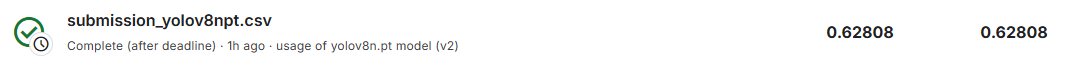

При использовании модели yolov8s.pt я получил следующие результаты:

1) обучение заняло 0.209 часа
2) Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
3) Результат валидации: mAP@0.5 = 0.85786, Precision = 0.87614, Recall = 0.75527
4) Результат на kaggle:

   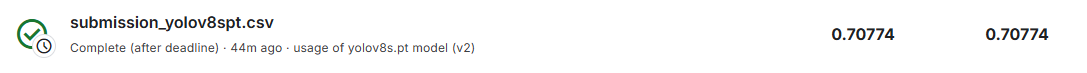

При использовании модели yolov8m.pt я получил следующие результаты:

1) обучение заняло 0.405 часа
2) Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
3) Результат валидации: mAP@0.5 = 0.84388, Precision = 0.84874, Recall = 0.78129
4) Результат на kaggle:

   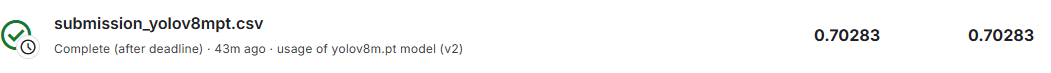

При использовании модели yolo11n.pt я получил следующие результаты:

1) обучение заняло 0.164 часа
2) YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
3) Результат валидации: mAP@0.5 = 0.81374, Precision = 0.81328, Recall = 0.73671
4) Результат на kaggle:

   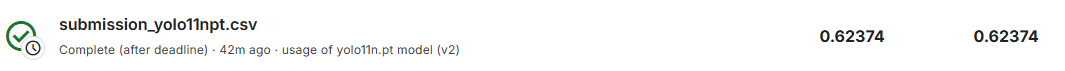

При использовании модели yolo11s.pt я получил следующие результаты:

1) обучение заняло 0.222 часа
2) YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
3) Результат валидации: mAP@0.5 = 0.83614, Precision = 0.83722, Recall = 0.75190
4) Результат на kaggle:

   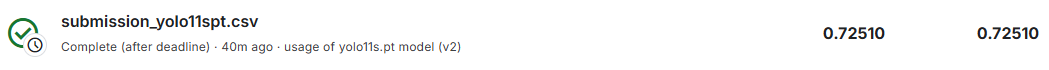

При использовании модели yolo11m.pt я получил следующие результаты:

1) обучение заняло 0.431 часа
2) YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
3) Результат валидации: mAP@0.5 = 0.84725, Precision = 0.86269, Recall = 0.76456
4) Результат на kaggle:

   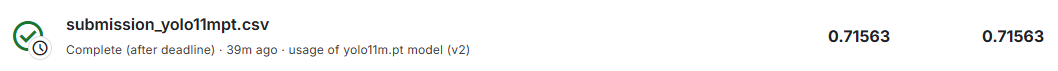

Результаты очень сильно зависят как от данных, так и от параметров модели, поэтому дальнейшие усилия можно направить по следующим направлениям:

1) Я никак не обрабатывал исходные изображения, однако можно провести их предобработку за счет аугментаций
2) Для выравнивания баланса между изображениями с чайками и изображениями без чаек, я генерировал новые изображения на основе существующих с применением аугментаций; вполне возможно, что можно найти такие аугментации или такие их параметры, которые улучшат результаты.
3) Можно сгенерировать дополнительные данные на основании существующих опять же с применением аугментаций над существующими изображениями.
4) Можно подбирать гиперпараметры используемых моделей
5) Можно попробовать использовать нейросети с совсем другой архитектурой, а не YOLO

PS. Основным сдерживающим фактором является ограниченность возможности использования GPU при обучении моделей как в google colab, так и в kaggle. А обучать модель на CPU практически не реально - я попробовал обучить модель yolov8n.pt на CPU в google colab - это у меня заняло несколько часов
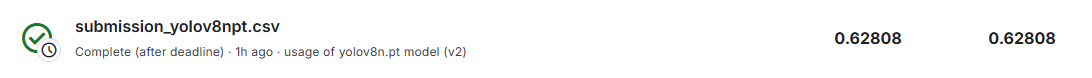
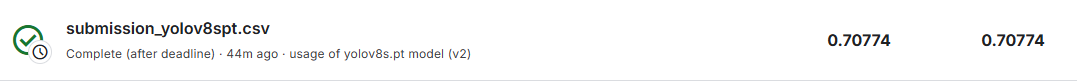
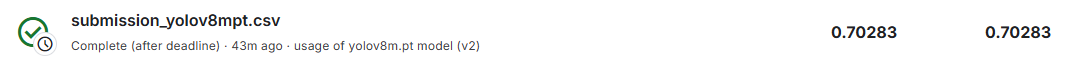
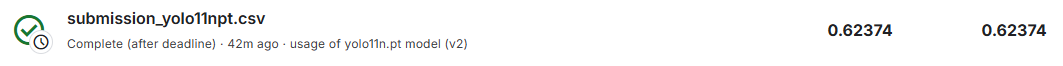
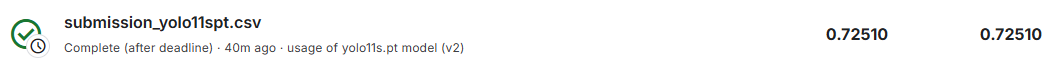
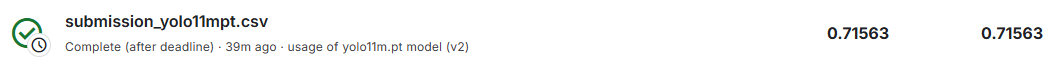